# Cafe & restaurants with seating capacity

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [7]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [8]:
plt.rcParams["figure.figsize"] = (10, 5)


In [9]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [10]:
if os.path.isfile("cafes-and-restaurants-with-seating-capacity.csv"):
    filepath = "cafes-and-restaurants-with-seating-capacity.csv"
    print("loading from file")
else:
    filepath = "..."
    print("loading from the internet")

seat_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [11]:
seat_data.head()


,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,Longitude,Latitude,location
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Indoor,230,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Outdoor,120,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
2,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Altius Coffee Brewers,"Shop , Ground , 517 Flinders Lane MELBOURNE 3000",4512,Takeaway Food Services,Seats - Outdoor,4,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
3,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Five & Dime Bagel,16 Flinders Lane MELBOURNE 3000,1174,Bakery Product Manufacturing (Non-factory based),Seats - Indoor,14,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
4,2017,11,103985,103985,562-564 Flinders Street MELBOURNE 3000,Melbourne (CBD),YHA Melbourne Central,562-564 Flinders Street MELBOURNE 3000,4400,Accommodation,Seats - Indoor,43,144.955635,-37.820595,"-37.82059511593975, 144.9556348088"


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [12]:
seat_data.sample(5)


,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,Longitude,Latitude,location
53178,2014,861,102505,102505,179-181 Domain Road SOUTH YARRA 3141,South Yarra,181 Domain Cafe Bar,181 Domain Road SOUTH YARRA 3141,4511,Cafes and Restaurants,Seats - Outdoor,20,144.982035,-37.834313,"-37.83431310932447, 144.9820354792"
18259,2016,85,105746,105746,183-265 La Trobe Street MELBOURNE 3000,Melbourne (CBD),Lord Of The Fries Melbourne Central,"Shop 146, Level 1, 300 La Trobe Street MELBOUR...",4512,Takeaway Food Services,Seats - Indoor,4,144.962848,-37.810903,"-37.810903109734795, 144.9628483153142"
40169,2011,33,105936,105936,433 Little Collins Street MELBOURNE 3000,Melbourne (CBD),Dikstein's Corner Bar,433 Little Collins Street MELBOURNE 3000,4511,Cafes and Restaurants,Seats - Outdoor,20,144.960342,-37.816314,"-37.81631387227728, 144.96034180595"
35379,2021,270,579293,104468,University House Building 112 230 Grattan Stre...,Parkville,University House Club,University House Building 112 230 Grattan Stre...,4530,Clubs (Hospitality),Seats - Indoor,421,144.961209,-37.796772,"-37.79677169577826, 144.9612087442"
29258,2015,21,606461,606461,607-623 Collins Street MELBOURNE 3000,Melbourne (CBD),Krispy Kreme Australia Pty Ltd,"Shop , 607 Collins Street MELBOURNE 3000",4511,Cafes and Restaurants,Seats - Indoor,31,144.954689,-37.819292,"-37.8192924326, 144.95468930417508"


We can also get the list of columns out of the data frame

In [41]:
seat_data.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Industry (ANZSIC4) code',
       'Industry (ANZSIC4) description', 'Seating type', 'Number of seats',
       'Longitude', 'Latitude', 'location'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [14]:
row_one = seat_data.iloc[1]
row_one


Census year                                                                    2017
Block ID                                                                          6
Property ID                                                                  578324
Base property ID                                                             573333
Building address                                   2 Swanston Street MELBOURNE 3000
CLUE small area                                                     Melbourne (CBD)
Trading name                                                        Transport Hotel
Business address                  Tenancy 29, Ground , 2 Swanston Street MELBOUR...
Industry (ANZSIC4) code                                                        4520
Industry (ANZSIC4) description                               Pubs, Taverns and Bars
Seating type                                                        Seats - Outdoor
Number of seats                                                             

Series objects are _very_ similar to dictionaries. They have more properties though.

In [15]:
row_one["Number of seats"]


120

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [16]:
row_one["Industry (ANZSIC4) description"]

'Pubs, Taverns and Bars'

Doing the same thing on a dataframe gives us the whole column

In [17]:
seat_data["Seating type"]

0         Seats - Indoor
1        Seats - Outdoor
2        Seats - Outdoor
3         Seats - Indoor
4         Seats - Indoor
              ...       
60050     Seats - Indoor
60051    Seats - Outdoor
60052     Seats - Indoor
60053     Seats - Indoor
60054    Seats - Outdoor
Name: Seating type, Length: 60055, dtype: object

<Axes: >

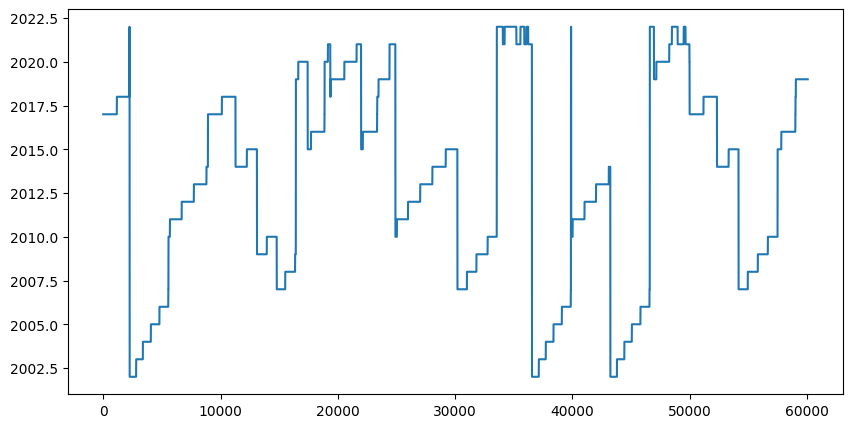

In [18]:
seat_data["Census year"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

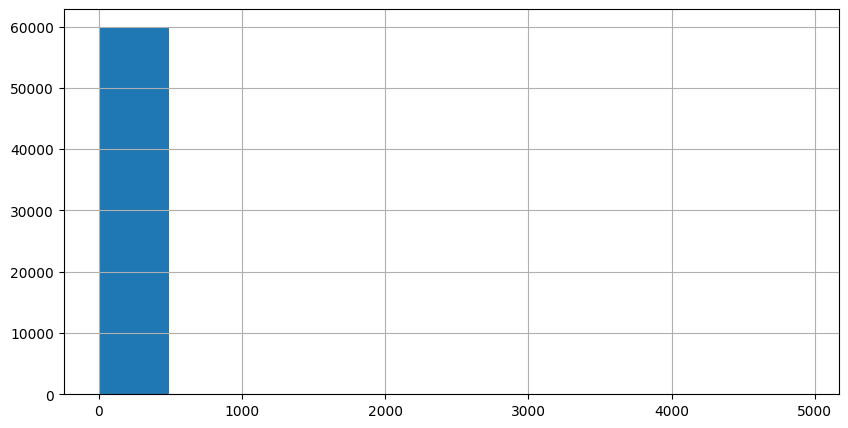

In [19]:
seat_data["Number of seats"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

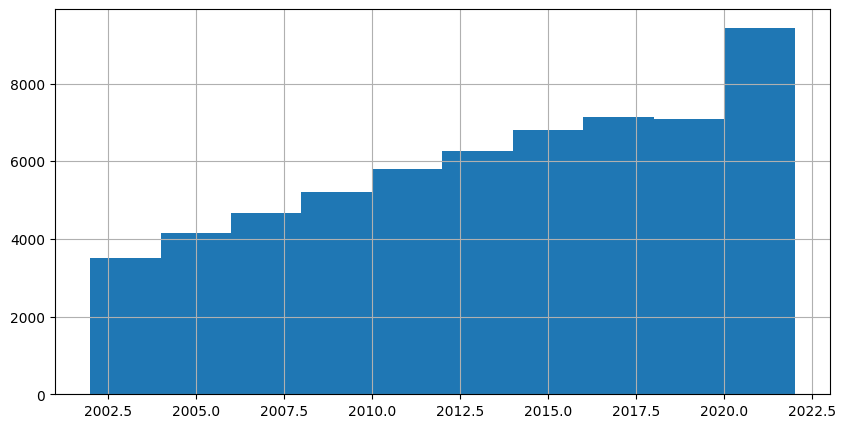

In [20]:
seat_data["Census year"][seat_data["Census year"] < 3000].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [21]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [22]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [23]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [24]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [25]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [26]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [27]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT AND LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [28]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [29]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'Number of seats under 300')

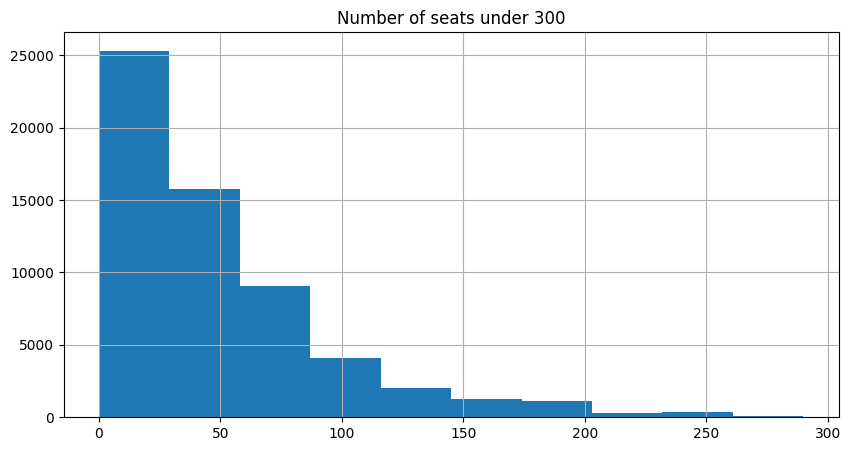

In [30]:
upper_bound = 300
seat_data["Number of seats"][seat_data["Number of seats"] < upper_bound].hist()
plt.title(f"Number of seats under {upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'Amount of cafes & restaurants under 2023')

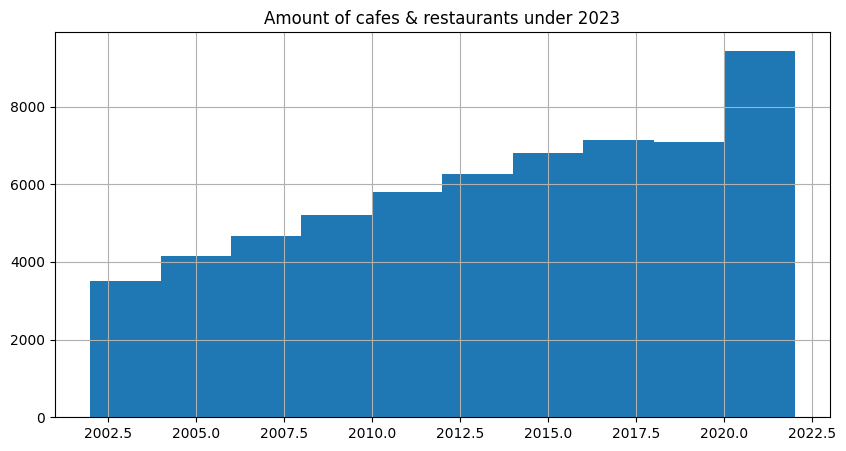

In [31]:
upper_bound = 2023
seat_data["Census year"][seat_data["Census year"] < upper_bound].hist()
plt.title(f"Amount of cafes & restaurants under {upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [32]:
seat_data.head(2)

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Trading name,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,Longitude,Latitude,location
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Indoor,230,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Outdoor,120,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"


We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [33]:
seat_data["Industry (ANZSIC4) description"].value_counts()

Industry (ANZSIC4) description
Cafes and Restaurants                              44982
Takeaway Food Services                              8164
Pubs, Taverns and Bars                              3716
Accommodation                                       1129
Other Specialised Food Retailing                     269
                                                   ...  
Other Auxiliary Finance and Investment Services        2
Architectural Services                                 2
Business and Professional Association Services         2
Management Advice and Other Consulting Services        2
Computer System Design and Related Services            1
Name: count, Length: 71, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='Industry (ANZSIC4) description'>

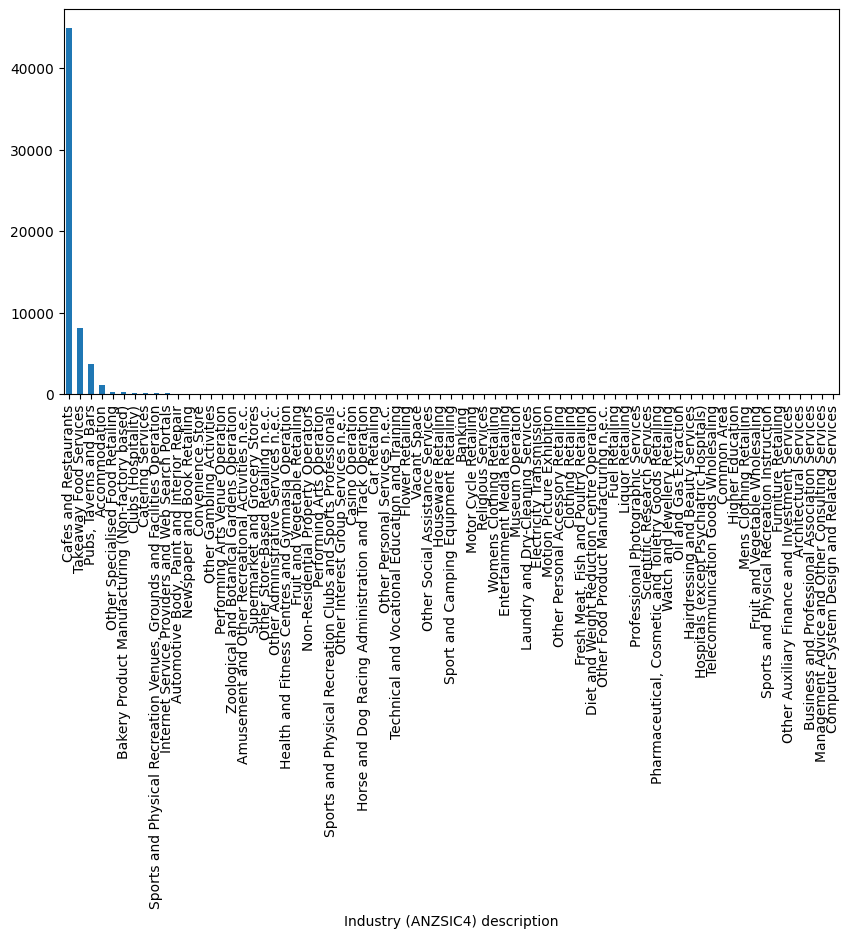

In [34]:
seat_data["Industry (ANZSIC4) description"].value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

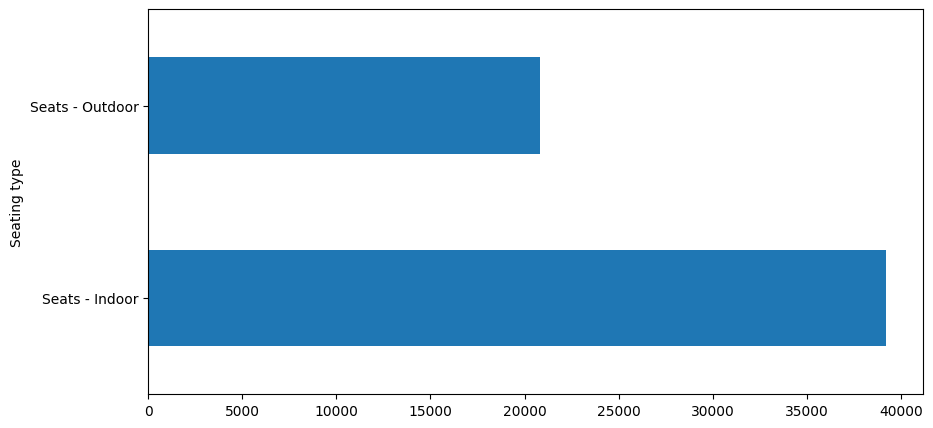

In [35]:
seating_type_counts = seat_data['Seating type'].value_counts()
seating_type_counts.plot(kind="barh");


This pattern keeps repeating itself:

<Axes: >

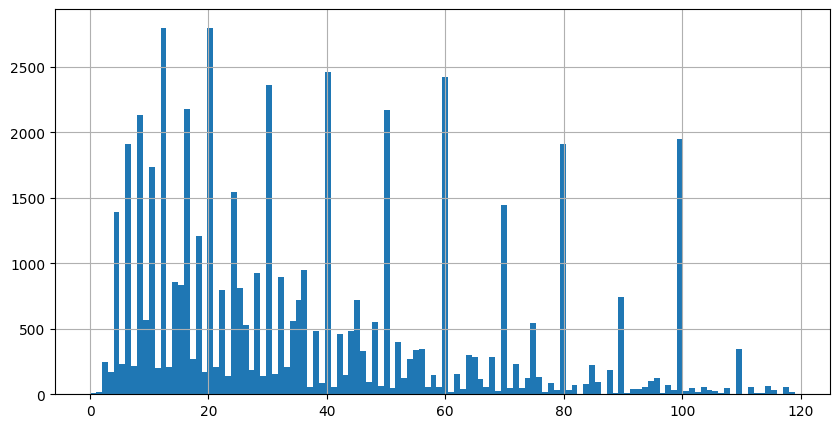

In [36]:
sd = seat_data["Number of seats"]
sd[sd<120].hist(bins=120)

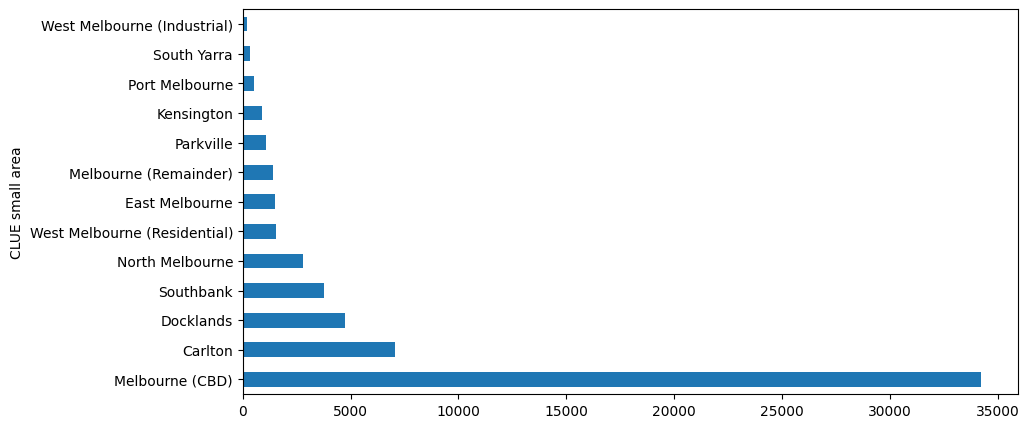

In [37]:
CLUE_small_area_counts = seat_data['CLUE small area'].value_counts()
CLUE_small_area_counts.plot(kind="barh");

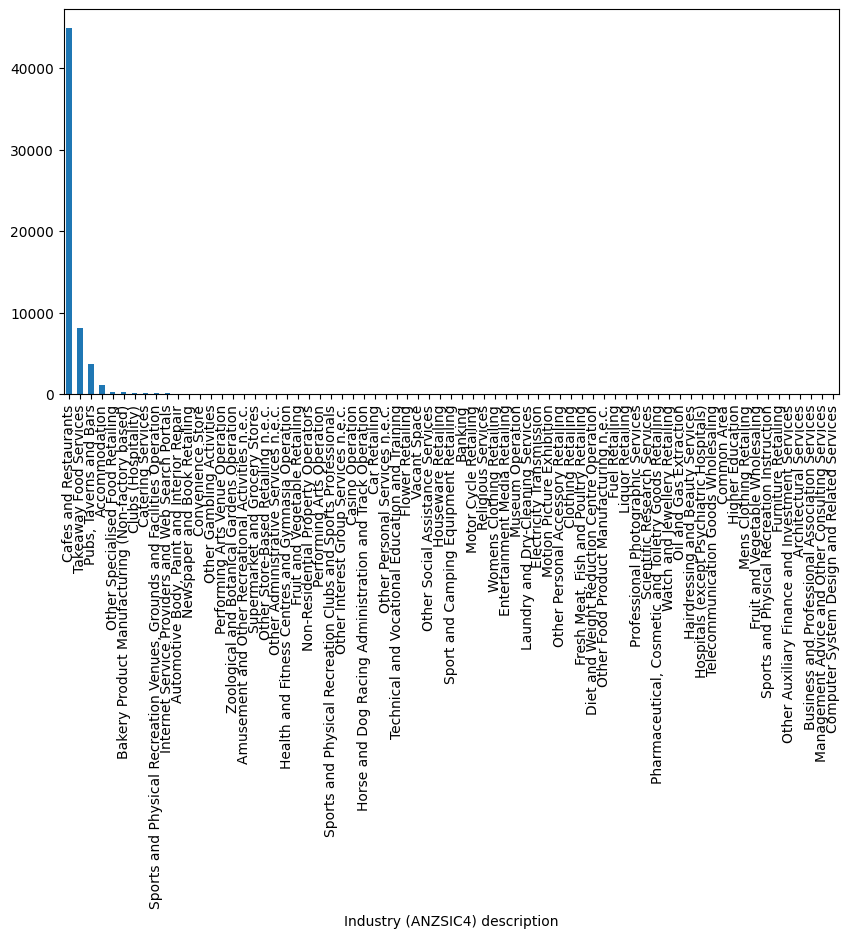

In [38]:
Industry_types_counts = seat_data['Industry (ANZSIC4) description'].value_counts()
Industry_types_counts.plot(kind="bar");

<Axes: xlabel='Industry (ANZSIC4) description'>

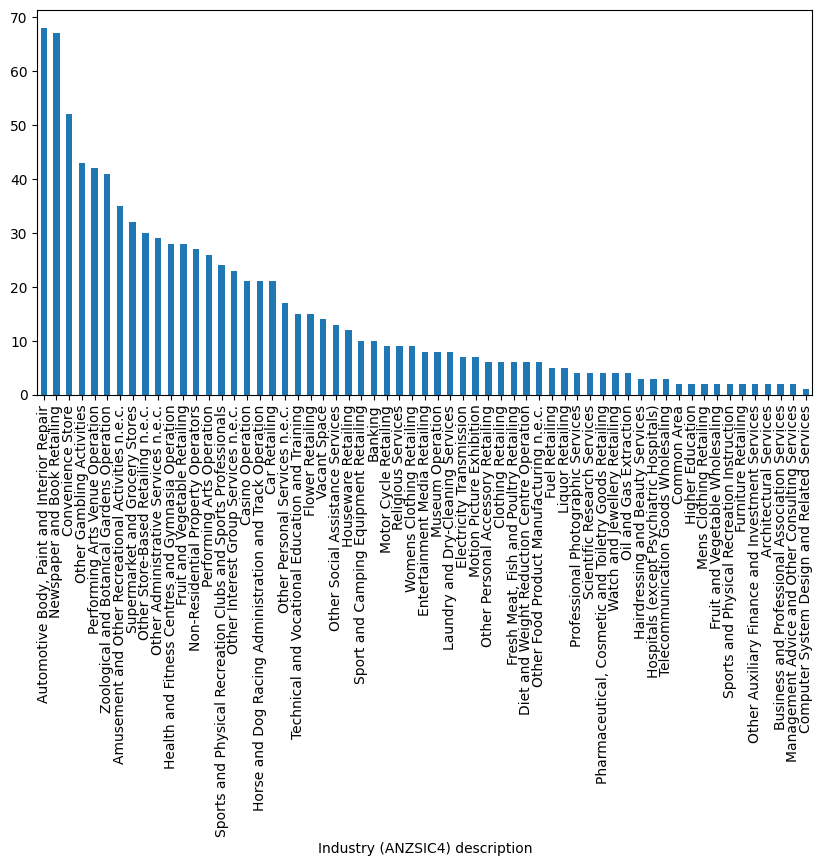

In [39]:
Industry_types_counts[Industry_types_counts < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<Axes: ylabel='Industry (ANZSIC4) description'>

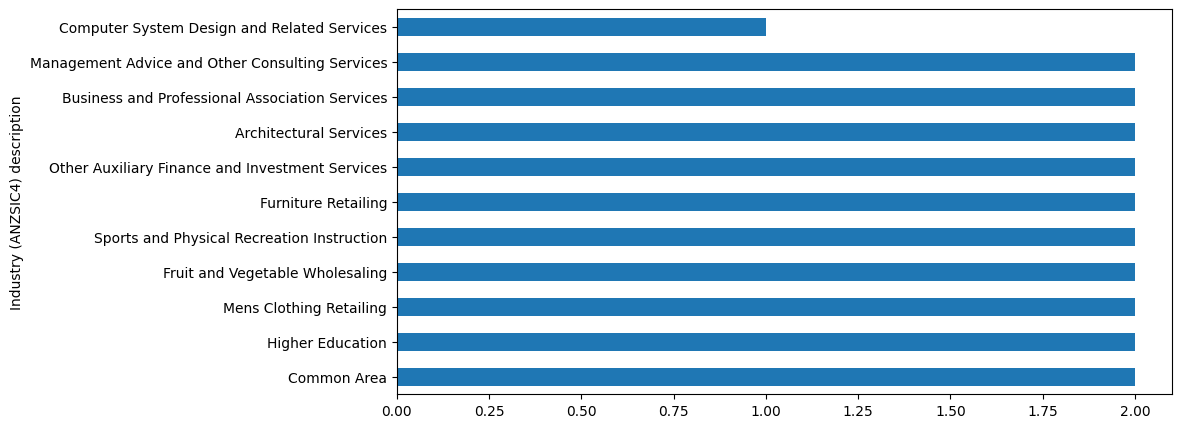

In [44]:
pdvc = Industry_types_counts[Industry_types_counts < 100]

pdvc[pdvc < 3].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [45]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


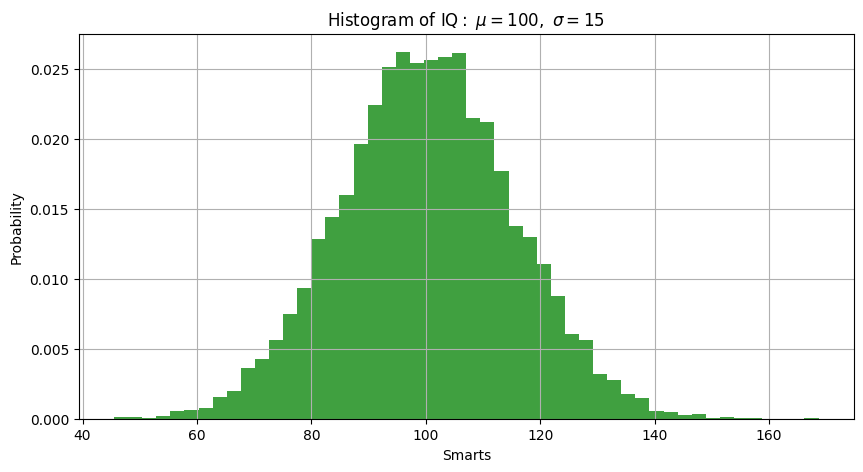

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

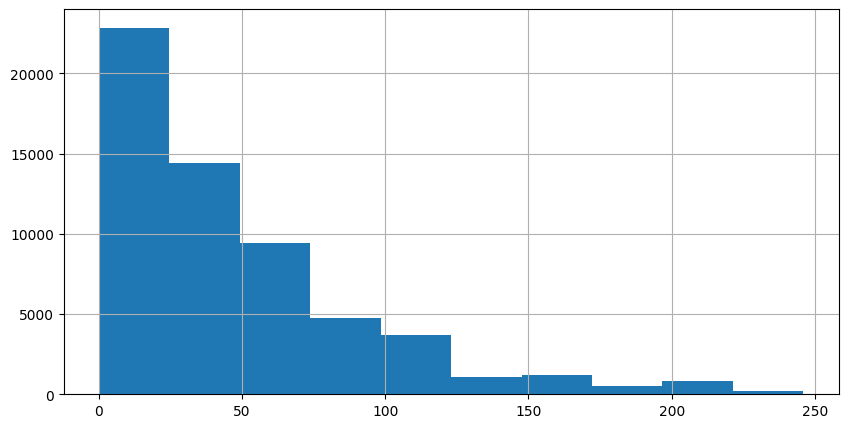

In [80]:
seat_data["Number of seats"][seat_data["Number of seats"] < 250].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

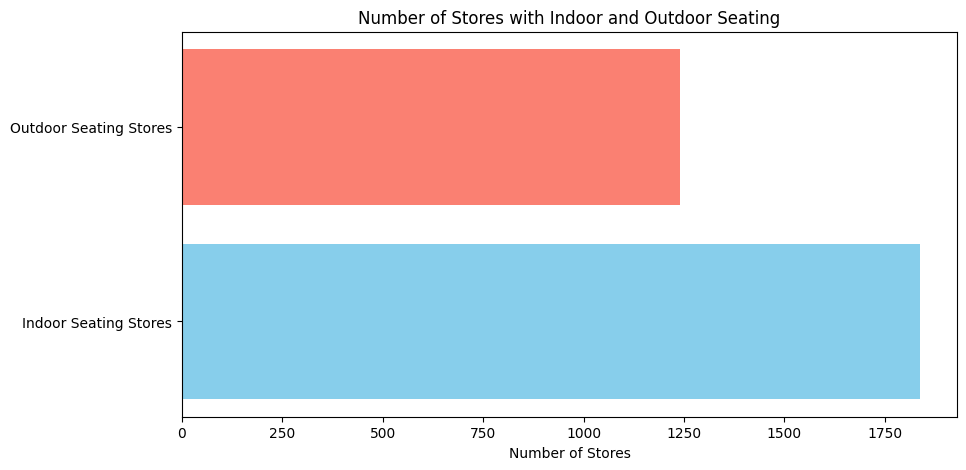

In [82]:
indoor_outdoor_counts = seat_data.groupby('Property ID')['Seating type'].unique()
store_with_indoor = indoor_outdoor_counts.apply(lambda x: 'Seats - Indoor' in x).sum()
store_with_outdoor = indoor_outdoor_counts.apply(lambda x: 'Seats - Outdoor' in x).sum()

seating_counts = {
    'Indoor Seating Stores': store_with_indoor,
    'Outdoor Seating Stores': store_with_outdoor
}
plt.barh(list(seating_counts.keys()), list(seating_counts.values()), color=['skyblue', 'salmon'])
plt.xlabel('Number of Stores')
plt.title('Number of Stores with Indoor and Outdoor Seating')
plt.show()

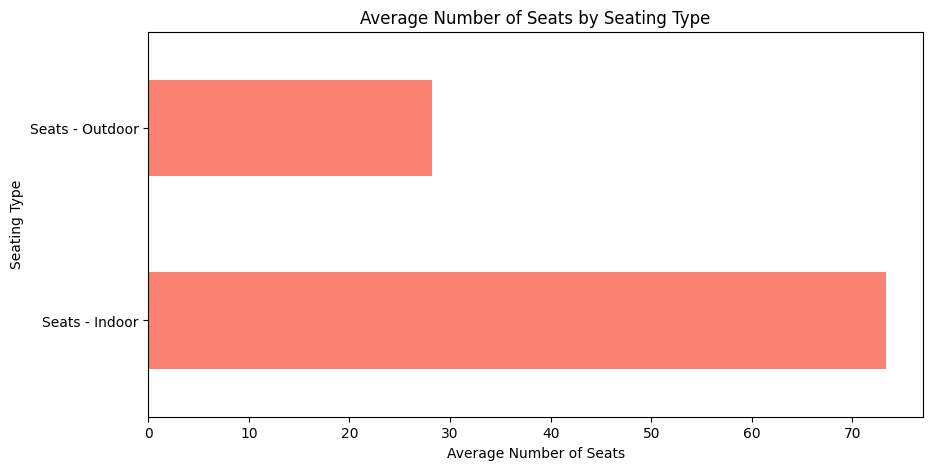

In [84]:
avg_seating_type_seats = seat_data.groupby('Seating type')['Number of seats'].mean()

seating_summary = pd.DataFrame({
    'Count': seating_type_counts,
    'Average Seats': avg_seating_type_seats
})

avg_seating_type_seats.plot(kind='barh')
plt.title('Average Number of Seats by Seating Type')
plt.xlabel('Average Number of Seats')
plt.ylabel('Seating Type')
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

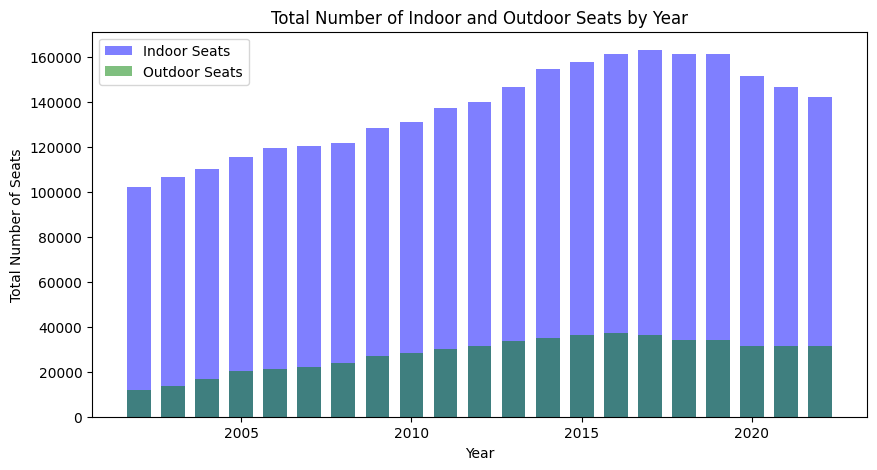

In [109]:
indoor_seats_per_year = seat_data[seat_data['Seating type'] == 'Seats - Indoor'].groupby('Census year')['Number of seats'].sum()

outdoor_seats_per_year = seat_data[seat_data['Seating type'] == 'Seats - Outdoor'].groupby('Census year')['Number of seats'].sum()

plt.bar(indoor_seats_per_year.index, indoor_seats_per_year, width=0.7, color='blue', alpha=0.5, label='Indoor Seats')
plt.bar(outdoor_seats_per_year.index, outdoor_seats_per_year, width=0.7, color='green', alpha=0.5, label='Outdoor Seats')

plt.title('Total Number of Indoor and Outdoor Seats by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Seats')

plt.legend()

plt.show()

We can go back to our initial, unfiltered, data:

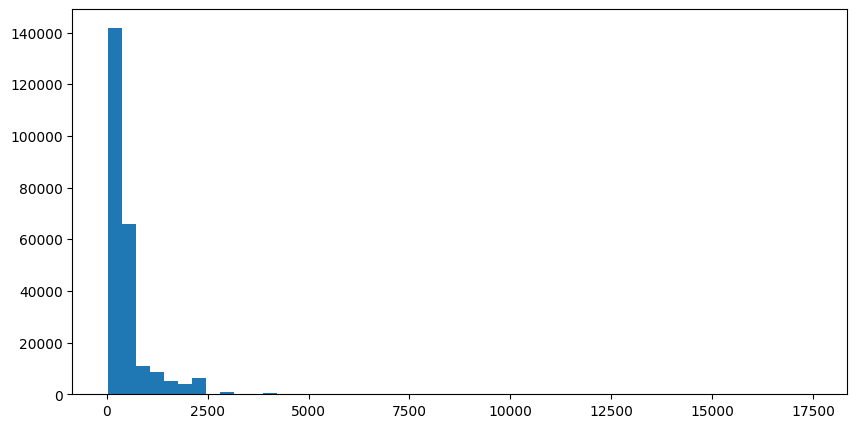

In [ ]:
plt.hist(penalty_data.FACE_VALUE, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

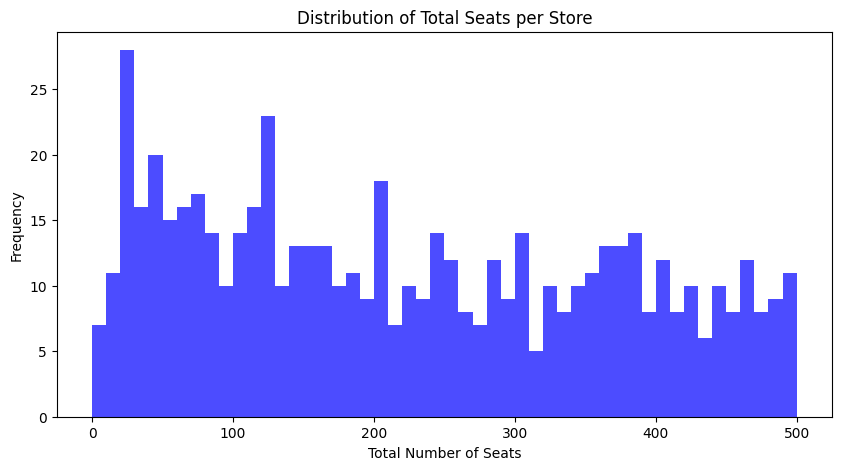

In [110]:
total_seats_per_store = seat_data.groupby('Property ID')['Number of seats'].sum()

plt.hist(total_seats_per_store, bins=50, range=(0, 500), facecolor="blue", alpha=0.7)

plt.title('Distribution of Total Seats per Store')
plt.xlabel('Total Number of Seats')
plt.ylabel('Frequency')

plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

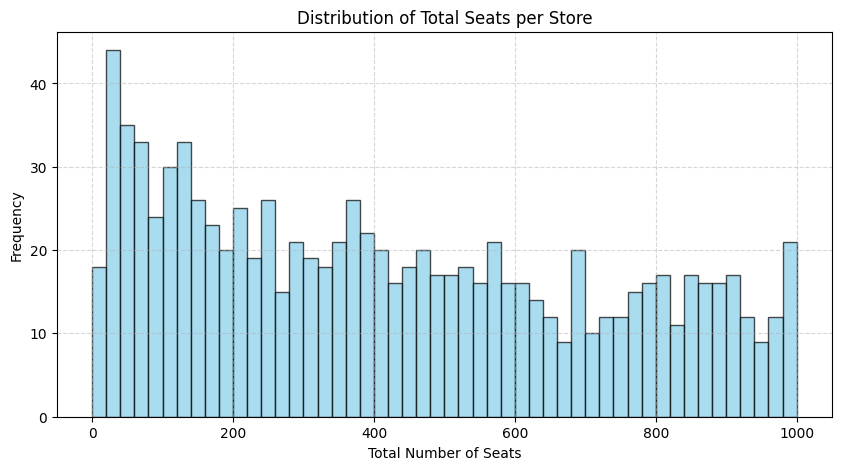

In [111]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000

plt.hist(
    total_seats_per_store,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Distribution of Total Seats per Store')
plt.xlabel('Total Number of Seats')
plt.ylabel('Frequency')

plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

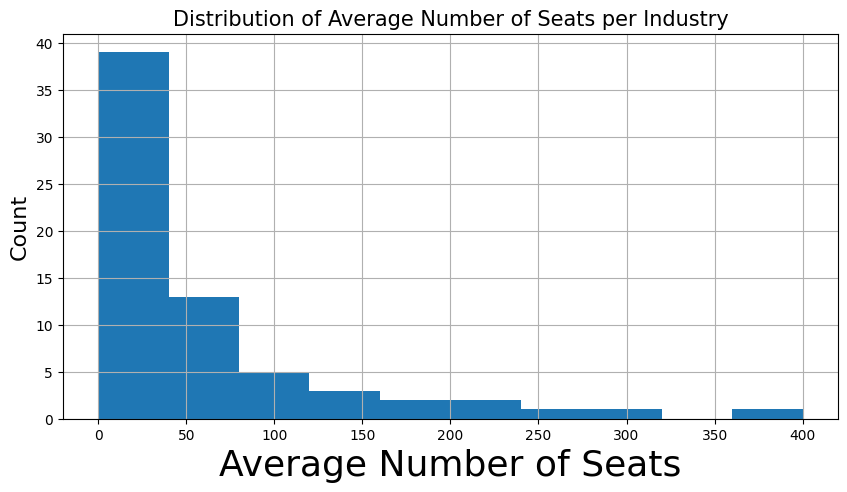

In [118]:
industry_seat_counts = seat_data.groupby('Industry (ANZSIC4) description')['Number of seats'].mean()

number_of_bins = 10
lower_bound = 0
upper_bound = 400

plt.hist(industry_seat_counts, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Distribution of Average Number of Seats per Industry", fontsize=15)
plt.xlabel("Average Number of Seats", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [119]:
data = pd.read_csv('cafes-and-restaurants-with-seating-capacity.csv')

data.head(2)

yearly_seats = data.groupby('Census year')['Number of seats'].sum()

print(yearly_seats)


Census year
2002    114191
2003    120153
2004    126818
2005    135682
2006    140553
2007    142513
2008    145637
2009    155007
2010    159667
2011    166952
2012    171129
2013    180109
2014    189346
2015    193714
2016    198747
2017    199222
2018    195256
2019    194972
2020    182994
2021    177932
2022    173221
Name: Number of seats, dtype: int64


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [120]:
first_year = data['Census year'].min()
last_year = data['Census year'].max()
f"range is: {first_year} to {last_year}"


'range is: 2002 to 2022'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [121]:
year_format_pattern = "%Y"

earliest_year = first_year
latest_year = last_year
f"range is: {earliest_year} to {latest_year}"

'range is: 2002 to 2022'

Which means that we can put those values into our graph title:

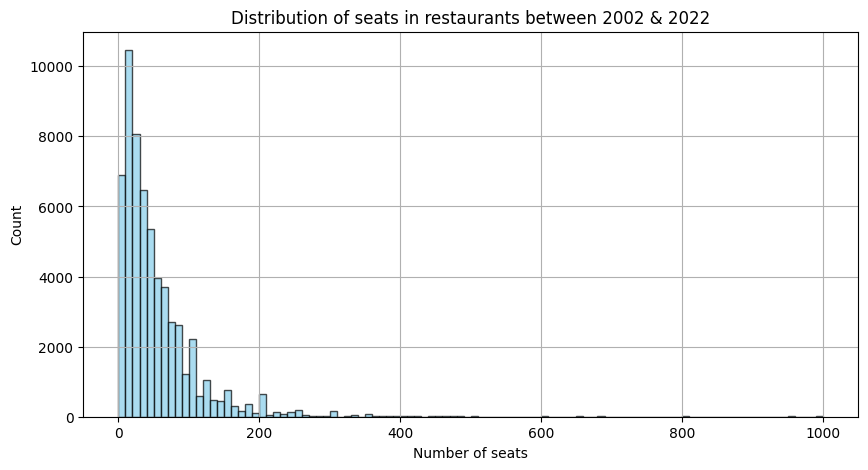

In [124]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    data["Number of seats"], bins=number_of_bins, range=(lower_bound, upper_bound), color='skyblue', edgecolor='black', alpha=0.7
)

plt.title(
    f"Distribution of seats in restaurants between {first_year} & {last_year}",
    fontsize=12,
)

plt.xlabel("Number of seats", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.grid(True)

plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

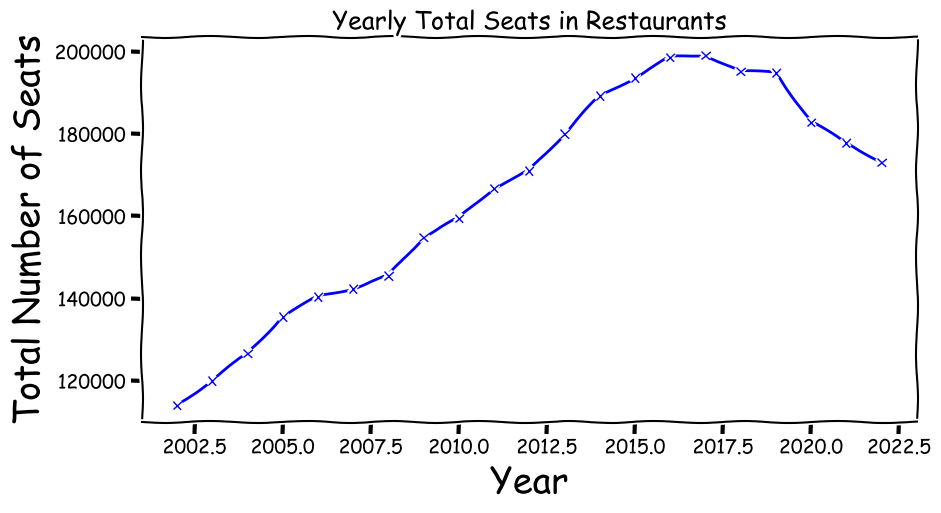

In [125]:
yearly_seats = data[["Census year", "Number of seats"]].groupby("Census year").sum()

plt.xkcd()

plt.plot(yearly_seats, "x-", color='blue')

plt.title("Yearly Total Seats in Restaurants", fontsize=18)
plt.xlabel("Year", fontsize=26)
plt.ylabel("Total Number of Seats", fontsize=26)

plt.grid(True)

plt.show()

In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


/var/folders/xk/nsw7gjj5683_7mb8vqlbzc1c0000gn/T/ipykernel_94889/1525795516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day_from_lambda
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670,1


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


/var/folders/xk/nsw7gjj5683_7mb8vqlbzc1c0000gn/T/ipykernel_94889/3824094348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day_from_lambda,day_from_function
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,46,16238,1,1


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


/var/folders/xk/nsw7gjj5683_7mb8vqlbzc1c0000gn/T/ipykernel_94889/2432571321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE,day_from_lambda,day_from_function,nice_day
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,NaN,NaN,NaN,NaN,NaN,46,16238,1,1,Friday


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<Axes: xlabel='nice_day'>

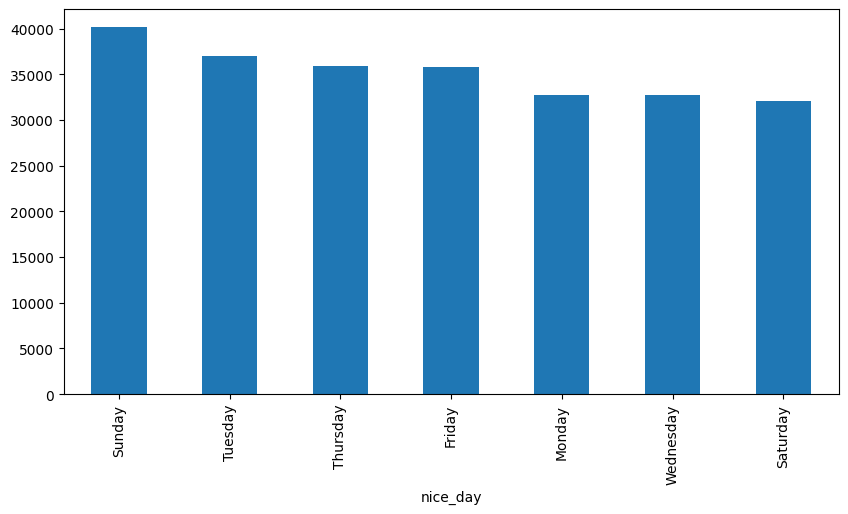

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_